In [213]:
# data analytics imports
import math
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
from scipy import stats
import scipy.sparse as sparse

# visualization imports
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import matplotlib.units as units

# machine learning imports for predicting churn
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import auc, classification_report, roc_auc_score, accuracy_score, f1_score, roc_curve, confusion_matrix, precision_score, recall_score

# spark imports for recommendation system
from pyspark.sql import SparkSession
from pyspark.sql.functions import UserDefinedFunction, explode, desc
from pyspark.sql.types import *
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.ml.recommendation import ALS
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.sql import Row

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

In [2]:
df1 = pd.read_csv('Order and Demographic V2.txt', sep="|", header = 0)
df1.head()

,Customer Name,Order Number,Order Date,Order Channel,Order Store,Order Store Zip,Ship Channel,Ship Store,Ship Store Zip,Department,Product Category,order_line_number,Qty,Gross Profit,Sales,Customer Zip,Customer DMA,Customer Age,Customer Children,Customer Residence Type,Customer Residence Unit,Customer Education,Customer Household Composition,Customer Homeowner,Customer Household Income,Customer Segment,Customer Group,Customer Gender,Customer Marital Status
0,Customer 1,17449384,2018-11-24,Direct,Store 18,8831,Direct,Ecom,NaN,WOMENS,OUTERWEAR,174493840500020181126026109606001,1,14.467,81.583,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
1,Customer 2,18044025,2019-03-04,Direct,Store 18,8831,Direct,Ecom,NaN,WOMENS,DRESSES,180440250500020190305005101984001,1,141.848,200.600,21093,Baltimore MD,67,Less Likely to Have Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Probable Renter,75000-99999,Modest Metro Means,Cultural Connections,Male,Likely Single
2,Customer 2,18116373,2019-03-20,Direct,Store 18,8831,Direct,Ecom,NaN,WOMENS,KNIT TOPS,181163730500020190321021102246001,1,85.340,137.700,21093,Baltimore MD,67,Less Likely to Have Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Probable Renter,75000-99999,Modest Metro Means,Cultural Connections,Male,Likely Single
3,Customer 2,18279255,2019-05-14,Direct,Store 18,8831,Direct,Ecom,NaN,MENS,ACCESSORIES,182792550500020190514014102439001,1,12.053,20.383,21093,Baltimore MD,67,Less Likely to Have Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Probable Renter,75000-99999,Modest Metro Means,Cultural Connections,Male,Likely Single
4,Customer 2,19219635,2019-12-02,Direct,Store 18,8831,Direct,Ecom,NaN,WOMENS,DRESSES,192196350500020191203003110710001,1,-5.406,49.963,21093,Baltimore MD,67,Less Likely to Have Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Probable Renter,75000-99999,Modest Metro Means,Cultural Connections,Male,Likely Single


In [374]:
df1.columns

Index(['Customer Name', 'Order Number', 'Order Date', 'Order Channel',
       'Order Store', 'Order Store Zip', 'Ship Channel', 'Ship Store',
       'Ship Store Zip', 'Department', 'Product Category', 'order_line_number',
       'Qty', 'Gross Profit', 'Sales', 'Customer Zip', 'Customer DMA',
       'Customer Age', 'Customer Children', 'Customer Residence Type',
       'Customer Residence Unit', 'Customer Education',
       'Customer Household Composition', 'Customer Homeowner',
       'Customer Household Income', 'Customer Segment', 'Customer Group',
       'Customer Gender', 'Customer Marital Status'],
      dtype='object')

In [3]:
# 10 Departments
df1.Department.unique()
# Product Category of Department Non: Mdse (Merchandize) SKUs - Non-Mdse SKUs

array(['WOMENS', 'MENS', 'BABY', 'BOYS', 'RETAIL CUSTOM',
       'HOME/PET/PROMO', 'GIRLS', 'Gift Cards', 'MISC UNKNOWN ITEMS',
       'Non'], dtype=object)

In [26]:
len(df1['Customer Name'].unique())

573446

In [58]:
df1['Customer Household Income'].unique()

array(['75000-99999', '1000-14999', '250000+', '50000-74999',
       '150000-174999', '200000-249999', '35000-49999', '100000-124999',
       '125000-149999', '15000-24999', '25000-34999', '175000-199999'],
      dtype=object)

In [5]:
df1[df1['Customer Name']=='Customer 1'].sort_values('Order Date')

,Customer Name,Order Number,Order Date,Order Channel,Order Store,Order Store Zip,Ship Channel,Ship Store,Ship Store Zip,Department,Product Category,order_line_number,Qty,Gross Profit,Sales,Customer Zip,Customer DMA,Customer Age,Customer Children,Customer Residence Type,Customer Residence Unit,Customer Education,Customer Household Composition,Customer Homeowner,Customer Household Income,Customer Segment,Customer Group,Customer Gender,Customer Marital Status
3417705,Customer 1,0003420180115003100035,2018-01-15,Retail,Store 31,20007,Retail,Store 31,20007.0,BOYS,KNIT TOPS,0003420180115003100035001,-1,-45.475,-76.500,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417706,Customer 1,0007020180218002100017,2018-02-18,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,SWIMWEAR,0007020180218002100017001,-1,-39.508,-61.183,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417707,Customer 1,0007020180218002100017,2018-02-18,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,SWIMWEAR,0007020180218002100017002,-1,-46.682,-101.983,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417708,Customer 1,0007020180218002100017,2018-02-18,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,SWIMWEAR,0007020180218002100017003,-1,-47.566,-67.983,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417709,Customer 1,0007020180914003100011,2018-09-14,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,KNIT TOPS,0007020180914003100011001,1,129.778,166.600,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417710,Customer 1,0007020180915002100018,2018-09-15,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,KNIT TOPS,0007020180915002100018001,1,129.778,166.600,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417711,Customer 1,0007020180915002100018,2018-09-15,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,KNIT TOPS,0007020180915002100018002,-1,-129.778,-166.600,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417712,Customer 1,0007020181023001100004,2018-10-23,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,WOVEN TOPS,0007020181023001100004001,1,103.802,149.600,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
3417713,Customer 1,0007020181023001100004,2018-10-23,Retail,Store 21,43219,Retail,Store 21,43219.0,WOMENS,SWEATERS,0007020181023001100004002,1,211.174,336.600,43209,Columbus OH,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married
2344183,

# Data Cleaning

In [16]:
# remove cases only when qty, sales, profit are all 0 to cancel out some returned orders
group = df1.groupby(['Customer Name','Order Number']).sum()
invoice = group[(group['Gross Profit']!=0)|(group['Qty']!=0)|(group['Sales']!=0)].reset_index()
invoiceNo = invoice['Order Number'].tolist()
df1Clean=df1[df1['Order Number'].isin(invoiceNo)]
df1Clean.describe().round(2)

,Order Store Zip,Ship Store Zip,Qty,Gross Profit,Sales,Customer Age
count,5356381.00,2910469.00,5356381.00,5356381.00,5356381.00,5356381.00
mean,20772.82,34441.27,0.83,39.67,62.46,50.08
std,20493.06,24268.22,0.62,54.46,75.55,16.16
min,1840.00,1940.00,-10.00,-977.57,-1368.50,19.00
25%,8831.00,11901.00,1.00,16.46,35.80,37.00
50%,8831.00,29910.00,1.00,37.04,61.20,50.00
75%,29572.00,46240.00,1.00,64.18,95.62,62.00
max,94925.00,94925.00,150.00,3224.22,3825.00,87.00


In [34]:
# drop Ship Store Zip as feature
df1.isnull().sum().sort_values(ascending = False)

Ship Store Zip                    2486707
Ship Channel                       142524
Customer DMA                        28992
Customer Zip                         1169
Customer Marital Status                 0
Qty                                     0
Order Number                            0
Order Date                              0
Order Channel                           0
Order Store                             0
Order Store Zip                         0
Ship Store                              0
Department                              0
Product Category                        0
order_line_number                       0
Sales                                   0
Gross Profit                            0
Customer Gender                         0
Customer Age                            0
Customer Children                       0
Customer Residence Type                 0
Customer Residence Unit                 0
Customer Education                      0
Customer Household Composition    

In [32]:
df1['Ship Store'].unique()

array(['Ecom', 'Store 113', 'Store 18', 'Store 69', 'Store 19',
       'Store 60', 'Store 59', 'Store 111', 'Missing Store Number',
       'Store 14', 'Store 74', 'Store 15', 'Store 80', 'Store 58',
       'Store 79', 'Store 118', 'Store 1', 'Store 52', 'Store 16',
       'Store 82', 'Store 25', 'Store 24', 'Store 26', 'Store 116',
       'Store 54', 'Store 62', 'Store 56', 'Store 45', 'Store 36',
       'Store 114', 'Store 44', 'Store 120', 'Store 27', 'Store 85',
       'Store 64', 'Store 31', 'Store 21', 'Store 61', 'Store 30',
       'Store 73', 'Store 88', 'Store 95', 'Store 97', 'Store 6',
       'Store 98', 'Store 107', 'Store 109', 'Store 76', 'Store 49',
       'Store 110', 'Store 57', 'Store 100', 'Store 81', 'Store 29',
       'Store 47', 'Store 51', 'Store 37', 'Store 87', 'Store 86',
       'Store 34', 'Store 53', 'Store 119', 'Store 108', 'Store 13',
       'Store 67', 'Store 103', 'Store 23', 'Store 65', 'Store 33',
       'Store 115', 'Store 92', 'Store 89', 'Store 11',

In [45]:
# change ship stores with Missing Store Number to nan to avoid creating unnecessary dummy variable
df1Clean['Ship Store']=df1Clean['Ship Store'].apply(lambda x:np.nan if x=='Missing Store Number' else x)
df1Clean[df1Clean['Ship Store'].isnull()]

,Customer Name,Order Number,Order Date,Order Channel,Order Store,Order Store Zip,Ship Channel,Ship Store,Ship Store Zip,Department,Product Category,order_line_number,Qty,Gross Profit,Sales,Customer Zip,Customer DMA,Customer Age,Customer Children,Customer Residence Type,Customer Residence Unit,Customer Education,Customer Household Composition,Customer Homeowner,Customer Household Income,Customer Segment,Customer Group,Customer Gender,Customer Marital Status
2362888,Customer 9,16337999,2018-02-12,Direct,Store 18,8831,NaN,NaN,NaN,WOMENS,WOVEN TOPS,163379990540420180227028100010001,-1,-85.255,-133.280,7931,New York NY,69,Probably Has Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Homeowner,150000-174999,Progressive Potpourri,Middle-Class Melting Pot,Female,Extremely Likely Married
2362889,Customer 9,16337999,2018-02-12,Direct,Store 18,8831,NaN,NaN,NaN,WOMENS,WOVEN TOPS,163379990540420180227028100010002,-1,-71.604,-133.280,7931,New York NY,69,Probably Has Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Homeowner,150000-174999,Progressive Potpourri,Middle-Class Melting Pot,Female,Extremely Likely Married
2362890,Customer 9,16405712,2018-03-07,Direct,Store 18,8831,NaN,NaN,NaN,WOMENS,WOVEN TOPS,164057120540420180323024100087001,-1,-27.557,-89.233,7931,New York NY,69,Probably Has Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Homeowner,150000-174999,Progressive Potpourri,Middle-Class Melting Pot,Female,Extremely Likely Married
2362891,Customer 9,16557996,2018-04-26,Direct,Store 18,8831,NaN,NaN,NaN,WOMENS,KNIT TOPS,165579960540420180522023100061001,-1,-98.872,-151.283,7931,New York NY,69,Probably Has Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Homeowner,150000-174999,Progressive Potpourri,Middle-Class Melting Pot,Female,Extremely Likely Married
2362892,Customer 9,16557996,2018-04-26,Direct,Store 18,8831,NaN,NaN,NaN,WOMENS,SWIMWEAR,165579960540420180522023100061002,-1,-92.174,-141.083,7931,New York NY,69,Probably Has Children,Single Family House,Single Family House,Extremely Likely High School Diploma,1 Adult Female,Homeowner,150000-174999,Progressive Potpourri,Middle-Class Melting Pot,Female,Extremely Likely Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505405,Customer 573060,19494836,2019-12-27,Direct,Store 18,8831,NaN,NaN,NaN,MENS,KNIT TOPS,194948360540420200114015100784001,-1,-27.608,-61.863,15241,Pittsburgh PA,51,Probably Does Not Have Children,Single Family House,Single Family House,Extremely Likely High School Diploma,2+ Adult Males,Homeowner,35000-49999,Aging in Place,Autumn Years,Female,Extremely Likely Married
2505406,Customer 573060,19494836,2019-12-27,Direct,Store 18,8831,NaN,NaN,NaN,WOMENS,OUTERWEAR,194948360540420200114015100784002,-1,-32.419,-90.423,15241,Pittsburgh PA,51,Probably Does Not Have Children,Single Family House,Single Family House,Extremely Likely High School Diploma,2+ Adult Males,Homeowner,35000-49999,Aging in Place,Autumn Years,Female,Extremely Likely Married
2505407,Customer 573353,19543417,2020-01-03,Direct,Store 18,8831,NaN,NaN,NaN,GIRLS,T-SHIRTS,195434170540420200129030100127001,-1,-29.920,-50.150,11766,New York NY,22,Has Children,Multi-Family and Condos,Duplex,Extremely Likely High School Diploma,"1 Adult Female, Child Present",Probable Homeowner,250000+,Settled in Suburbia,Suburban Style,Female,Likely Married
2505408,Customer 573421,16330373,2018-02-08,Direct,Store 18,8831,NaN,NaN,NaN,WOMENS,SWEATERS,163303730540420180223024100003001,-1,-127.194,-166.600,33410,West Palm Beach-Fort Pierce FL,48,Probably Does Not Have Children,Single Family House,Single Family House,Extremely Likely Bachelor Degree,2+ Adult Males,Homeowner,50000-74999,Reaping Rewards,Golden Year Guardians,Male,Likely Married


# Popularity analysis

In [237]:
# aggregate number of times a SKU was purchased by a customer
df1[df1.Sales>0].groupby(['Customer Name', 'SKU']).agg({'Qty': 'count'}).rename(columns={'Qty': 'Purchase Frequency'}).reset_index().describe().round(2) 

,Purchase Count
count,2084990.00
mean,2.11
std,2.49
min,1.00
25%,1.00
50%,1.00
75%,2.00
max,511.00


In [96]:
# total qty purchased for each SKU by each customer
QtyPur = df1.groupby(['Customer Name', 'SKU']).agg({'Qty': 'sum'}).rename(columns={'Qty': 'Qty Purchased'}).reset_index()
QtyPur.describe().round(2)

,Qty Purchased
count,2132915.00
mean,5.73
std,7.73
min,-51.00
25%,3.00
50%,3.00
75%,6.00
max,2631.00


In [55]:
history.groupby(['SKU','Customer Name']).sum().groupby('SKU').mean().sort_values(by='Scaled Qty Purchased',ascending=False)[:10:]

,Scaled Qty Purchased
SKU,
SKU93,0.933333
SKU78,0.647059
SKU911,0.628004
SKU917,0.625000
SKU97,0.416667
SKU44,0.382979
SKU919,0.363636
SKU216,0.341951
SKU27,0.260578


In [60]:
popularity=df_matrix.mean().sort_values(ascending=False)[:10:].reset_index()
popularity=popularity.rename(columns={popularity.columns[1]:'Popularity Score'})
popularity

,SKU,Popularity Score
0,SKU618,3.532261
1,SKU218,1.923660
2,SKU66,1.788671
3,SKU619,1.468490
4,SKU1018,1.067086
5,SKU106,0.933996
6,SKU61,0.921979
7,SKU26,0.681072
8,SKU614,0.616614
9,SKU318,0.562505


# Label Churn using 12-month threshold and non-churn using 6-month

Through the testing results at the back of the code, using 12-month threshold for labelling churn and 6-month for non-churn give the highest accuracies

In [17]:
# first transaction date 2018-01-07
print(min(df1['Order Date']))
max(df1['Order Date'])
# last transaction date 2020-01-04

2018-01-07


'2020-01-04'

In [53]:
# orders with valid sales transactions, no returned orders
purchases = df1Clean[(df1Clean['Sales'] > 0)]
order = purchases[['Customer Name', 'Order Number', 'Order Channel', 'Order Store', 'Ship Channel', 'Ship Store', 
                   'Department', 'Product Category']]

In [19]:
purchases['Customer Name'].drop_duplicates()
#573446 customers total
#566316 customers made valid puchases

0               Customer 1
2               Customer 2
5               Customer 4
6               Customer 5
12              Customer 7
                ...       
5435286    Customer 573408
5435288    Customer 573416
5435310    Customer 573420
5435406    Customer 573434
5435430    Customer 573445
Name: Customer Name, Length: 566316, dtype: object

In [182]:
# find the lastest order date for each customer
lastOrder=purchases.sort_values(['Customer Name','Order Date'],ascending=False).drop_duplicates('Customer Name')[['Customer Name','Order Date']]
# set 'Customer Name' as index for last_order df to effciently look for customers by conditions
lastOrder.index=lastOrder['Customer Name']
# find number of orders each customer placed by counting unique values of 'Order Date'
numOrders = purchases.groupby('Customer Name').agg({'Order Date': "nunique"}).sort_values('Order Date')
# 278318 customers ordered only once during the whole period
one = numOrders[numOrders['Order Date']==1].index.to_list()
numOrders=numOrders.rename(columns = {'Order Date':'Num of Purchases'})
len(one)

278318

In [229]:
one=numOrders[numOrders['Num of Purchases']==1]
one.merge(label, left_index=True, right_index=True, how = 'inner')
# 136512 one-time customers labelled as churn

,Num of Purchases,Customer Zip,Customer Age,Customer Children,Sales Returned Avg,Cost Returned Avg,Gross Profit Returned Avg,Qty Returned Avg,Sales Made Avg,Cost Made Avg,Gross Profit Made Avg,Qty Made Avg,Profit Margin,Profitability,Ship Channel 2,Ship Channel 3,Ship Channel 4,Ship Channel 5,Ship Channel 6,Ship Store 10,Ship Store 100,Ship Store 101,Ship Store 102,Ship Store 103,Ship Store 104,Ship Store 105,Ship Store 106,Ship Store 107,Ship Store 108,Ship Store 109,Ship Store 11,Ship Store 110,Ship Store 111,Ship Store 112,Ship Store 113,Ship Store 114,Ship Store 115,Ship Store 116,Ship Store 117,Ship Store 118,Ship Store 119,Ship Store 12,Ship Store 120,Ship Store 121,Ship Store 13,Ship Store 14,Ship Store 15,Ship Store 16,Ship Store 17,Ship Store 18,...,Customer Segment 49,Customer Segment 5,Customer Segment 50,Customer Segment 51,Customer Segment 52,Customer Segment 53,Customer Segment 54,Customer Segment 55,Customer Segment 56,Customer Segment 57,Customer Segment 58,Customer Segment 59,Customer Segment 6,Customer Segment 60,Customer Segment 61,Customer Segment 62,Customer Segment 63,Customer Segment 64,Customer Segment 65,Customer Segment 66,Customer Segment 67,Customer Segment 68,Customer Segment 69,Customer Segment 7,Customer Segment 70,Customer Segment 71,Customer Segment 8,Customer Segment 9,Customer Group 10,Customer Group 11,Customer Group 12,Customer Group 13,Customer Group 14,Customer Group 15,Customer Group 16,Customer Group 17,Customer Group 18,Customer Group 19,Customer Group 2,Customer Group 3,Customer Group 4,Customer Group 5,Customer Group 6,Customer Group 7,Customer Group 8,Customer Group 9,Customer Gender 2,Customer Marital Status 2,Customer Marital Status 3,Churn
Customer 357643,1,4411.0,61.0,4.0,0.0,0.000,0.000,0.0,59.483,19.278,40.205,3.0,0.675907,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Customer 288853,1,6328.0,15.0,4.0,-255.0,-62.305,-192.695,-6.0,648.329,180.489,467.840,15.0,0.721609,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
Customer 288852,1,6777.0,52.0,3.0,0.0,0.000,0.000,0.0,131.665,29.903,101.762,9.0,0.772886,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Customer 288844,1,6042.0,18.0,3.0,0.0,0.000,0.000,0.0,414.919,285.192,129.727,39.0,0.312656,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
Customer 288841,1,6059.0,15.0,1.0,0.0,0.000,0.000,0.0,135.150,31.297,103.853,6.0,0.768428,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [184]:
# customers placed first order in the recent 6 months
new = lastOrder.loc[one,:][lastOrder.loc[one,:]['Order Date']>='2019-07-04'].sort_values('Order Date').index.to_list()
# unlabel customers placed first order in recent 6 months
lastOrder.drop(new,axis=0,inplace=True)
# label churn for customers whose last orders were before the recent 12 months
# last orders in recent 6 months are non-churn, the rest are unlabelled
lastOrder['Churn']=lastOrder['Order Date'].apply(lambda x:1 if x<'2019-01-04' else 0 if x>='2019-07-04' else np.nan)
lastOrder.groupby('Churn').count()
# distribution of both classes for churn are balanced

,Customer Name,Order Date
Churn,,
0.0,185982,185982
1.0,184199,184199


In [185]:
# new customers whose first purchase happened within the past 6 months
len(new)

90379

In [27]:
lastOrder.dropna(axis=0)
# 370181 labelled

,Customer Name,Order Date,Churn
Customer Name,,,
Customer 99998,Customer 99998,2019-01-02,1.0
Customer 99997,Customer 99997,2018-09-03,1.0
Customer 99996,Customer 99996,2019-12-27,0.0
Customer 99995,Customer 99995,2019-09-08,0.0
Customer 99994,Customer 99994,2018-12-22,1.0
...,...,...,...
Customer 100000,Customer 100000,2018-11-25,1.0
Customer 10000,Customer 10000,2019-12-30,0.0
Customer 1000,Customer 1000,2018-04-24,1.0


# Tramsforming Order and Demographic Data to Customer Data

In [56]:
# customer demographics
customerVar = ['Customer Name', 'Customer DMA', 'Customer Zip', 'Customer Age', 'Customer Children', 
               'Customer Residence Type', 'Customer Residence Unit', 'Customer Education', 
               'Customer Household Composition', 'Customer Homeowner', 'Customer Household Income', 
               'Customer Segment', 'Customer Group', 'Customer Gender', 'Customer Marital Status']
customerDemo = df1[customerVar].drop_duplicates(['Customer Name'])
customerDemo.index=customerDemo['Customer Name']

# Feature Engineering

In [54]:
# get dummy for order channel and store
orderInfo = order.sort_values(['Customer Name','Order Number']).drop_duplicates(['Customer Name','Order Number'])[['Customer Name','Order Number','Order Channel','Order Store']]
orderInfo = pd.get_dummies(data = orderInfo, prefix_sep='_', drop_first=True, columns = ['Order Channel','Order Store'])
# get dummy for Ship Channel', 'Ship Store', 'Department', 'Product Category
dummy = pd.get_dummies(data = order, prefix_sep='_', drop_first=True, 
               columns = ['Ship Channel', 'Ship Store', 'Department', 'Product Category'])
categorical = dummy.groupby(['Customer Name','Order Number']).sum()
categorical.head()

Ship Channel_Event  \
Customer Name Order Number                                 
Customer 1    0007020180914003100011                   0   
              0007020181023001100004                   0   
              0007020190926002100014                   0   
              0007020191202001100016                   0   
              17277858                                 0   

                                      Ship Channel_Outlets  \
Customer Name Order Number                                   
Customer 1    0007020180914003100011                     0   
              0007020181023001100004                     0   
              0007020190926002100014                     0   
              0007020191202001100016                     0   
              17277858                                   0   

                                      Ship Channel_Retail  Ship Store_Store 1  \
Customer Name Order Number                                                      
Customer 1    0007020180914003100011                    1                   0   
              0007020181023001100004                    2                   0   
              0007020190926002100014                    1                   0   
              0007020191202001100016                    1                   0   
              17277858                                  1                   0   

                                      Ship Store_Store 10  \
Customer Name Order Number                                  
Customer 1    0007020180914003100011                    0   
              0007020181023001100004                    0   
              0007020190926002100014                    0   
              0007020191202001100016                    0   
              17277858                                  0   

                                      Ship Store_Store 100  \
Customer Name Order Number                                   
Customer 1    0007020180914003100011                     0   
              0007020181023001100004                     0   
              0007020190926002100014                     0   
              0007020191202001100016                     0   
              17277858                                   0   

                                      Ship Store_Store 101  \
Customer Name Order Number                                   
Customer 1    0007020180914003100011                     0   
              0007020181023001100004                     0   
              0007020190926002100014                     0   
              0007020191202001100016                     0   
              17277858                                   0   

                                      Ship Store_Store 102  \
Customer Name Order Number                                   
Customer 1    0007020180914003100011                     0   
              0007020181023001100004                     0   
              0007020190926002100014                     0   
              0007020191202001100016                     0   
              17277858                                   0   

                                      Ship Store_Store 103  \
Customer Name Order Number                                   
Customer 1    0007020180914003100011                     0   
              0007020181023001100004                     0   
              0007020190926002100014                     0   
              0007020191202001100016                     0   
              17277858                                   0   

                                      Ship Store_Store 104  \
Customer Name Order Number                                   
Customer 1    0007020180914003100011                     0   
              0007020181023001100004                     0   
              0007020190926002100014                     0   
              0007020191202001100016                     0   
              17277858                                   0   

           

In [55]:
# aggregate the dummy variable by customers
orderInfo = orderInfo.groupby('Customer Name').sum()
categorical = categorical.groupby('Customer Name').sum()
orderDF = categorical.merge(orderInfo, left_index=True, right_index=True, how = 'outer')
orderDF=orderDF.applymap(lambda x:1 if x>1 else x)
# change sum results to dummy, which represent a customer has ordered from specific channel or store
orderDF.head()

,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,Ship Store_Store 24,Ship Store_Store 25,Ship Store_Store 26,Ship Store_Store 27,Ship Store_Store 28,Ship Store_Store 29,Ship Store_Store 3,Ship Store_Store 30,Ship Store_Store 31,Ship Store_Store 32,Ship Store_Store 33,...,Order Store_Store 53,Order Store_Store 54,Order Store_Store 55,Order Store_Store 56,Order Store_Store 57,Order Store_Store 58,Order Store_Store 59,Order Store_Store 6,Order Store_Store 60,Order Store_Store 61,Order Store_Store 62,Order Store_Store 63,Order Store_Store 64,Order Store_Store 65,Order Store_Store 66,Order Store_Store 67,Order Store_Store 68,Order Store_Store 7,Order Store_Store 70,Order Store_Store 71,Order Store_Store 72,Order Store_Store 73,Order Store_Store 74,Order Store_Store 75,Order Store_Store 76,Order Store_Store 77,Order Store_Store 78,Order Store_Store 79,Order Store_Store 8,Order Store_Store 80,Order Store_Store 81,Order Store_Store 82,Order Store_Store 83,Order Store_Store 84,Order Store_Store 85,Order Store_Store 86,Order Store_Store 87,Order Store_Store 88,Order Store_Store 89,Order Store_Store 9,Order Store_Store 90,Order Store_Store 91,Order Store_Store 92,Order Store_Store 93,Order Store_Store 94,Order Store_Store 95,Order Store_Store 96,Order Store_Store 97,Order Store_Store 98,Order Store_Store 99
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Customer 1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Customer 10,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Customer 100,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Customer 1000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Customer 10000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [78]:
# total purchases
purchaseAmount = purchases.groupby(['Customer Name', 'Order Number'])['Sales','Qty','Gross Profit'].sum().groupby(['Customer Name']).mean()
# total purchases and returns amount for each customer
customerValues = df1[df1.Sales>0][['Customer Name','Sales','Qty','Gross Profit']].groupby('Customer Name').sum()
# total returns amount for each customer
returns = df1[(df1['Sales'] < 0) & (df1['Qty'] < 0)].groupby(['Customer Name','Order Number'])
#avgReturn = returns['Sales','Qty','Gross Profit'].sum().groupby(['Customer Name']).mean()
totalReturn = returns['Sales','Qty','Gross Profit'].sum().groupby(['Customer Name']).sum()
percentReturn = abs(totalReturn)/customerValues
percentReturn

,Sales,Qty,Gross Profit
Customer Name,,,
Customer 1,0.637625,0.777778,0.562826
Customer 10,NaN,NaN,NaN
Customer 100,NaN,NaN,NaN
Customer 1000,0.626186,0.500000,0.586126
Customer 10000,0.684222,0.562500,0.734156
...,...,...,...
Customer 99995,0.168450,0.130435,0.159387
Customer 99996,0.051088,0.043478,0.064159
Customer 99997,NaN,NaN,NaN


In [79]:
purReturn = percentReturn.merge(purchaseAmount, on = 'Customer Name', how = 'outer', suffixes=(' Returned %', ' Avg'))
customer = customerDemo.merge(purReturn, left_index=True, right_index=True, how = 'outer')
customer

,Customer Name,Customer DMA,Customer Zip,Customer Age,Customer Children,Customer Residence Type,Customer Residence Unit,Customer Education,Customer Household Composition,Customer Homeowner,Customer Household Income,Customer Segment,Customer Group,Customer Gender,Customer Marital Status,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg
Customer Name,,,,,,,,,,,,,,,,,,,,,
Customer 1,Customer 1,Columbus OH,43209,44,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,75000-99999,Kids and Cabernet,Power Elite,Male,Extremely Likely Married,0.637625,0.777778,0.562826,167.843833,1.333333,101.781833
Customer 10,Customer 10,New York NY,6897,42,Probably Does Not Have Children,Multi-Family and Condos,101+ Units,Extremely Likely Bachelor Degree,1 Adult Female,Probable Homeowner,200000-249999,"Full Pockets, Empty Nests",Thriving Boomers,Male,Likely Single,NaN,NaN,NaN,227.162500,2.250000,177.059250
Customer 100,Customer 100,Atlanta GA,30075,51,Less Likely to Have Children,Single Family House,Single Family House,Likely Some College,2+ Adult Males,Homeowner,75000-99999,Settled in Suburbia,Suburban Style,Female,Extremely Likely Married,NaN,NaN,NaN,160.650000,2.000000,115.719000
Customer 1000,Customer 1000,Louisville KY,40241,24,Has Children,Single Family House,Single Family House,Extremely Likely Some College,"1 Adult Female, 1 Adult Male, Child Present",Homeowner,15000-24999,"Red, White and Bluegrass",Families in Motion,Male,Likely Married,0.626186,0.500000,0.586126,447.950000,2.000000,305.354000
Customer 10000,Customer 10000,New York NY,07930,61,Has Children,Single Family House,Single Family House,Extremely Likely Bachelor Degree,"1 Adult Female, 1 Adult Male, Child Present",Renter,1000-14999,Settled in Suburbia,Suburban Style,Male,Extremely Likely Married,0.684222,0.562500,0.734156,308.601000,3.100000,203.568200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Customer 99995,Customer 99995,Kansas City MO,66205,31,Probably Does Not Have Children,Multi-Family and Condos,10-19 Units,Extremely Likely Some College,1 Adult Male,Probable Renter,50000-74999,Colleges and Cafes,Singles and Starters,Female,Likely Single,0.168450,0.130435,0.159387,320.782714,3.285714,228.676714
Customer 99996,Customer 99996,Miami-Ft. Lauderdale FL,33134,53,Probably Does Not Have Children,Multi-Family and Condos,Triplex,Extremely Likely Some College,1 Adult Male,Probable Homeowner,1000-14999,Footloose and Family Free,Golden Year Guardians,Female,Extremely Likely Married,0.051088,0.043478,0.064159,317.804538,3.461538,189.999846
Customer 99997,Customer 99997,Milwaukee WI,53072,64,Less Likely to Have Children,Single Family House,Single Family House,Extremely Likely Some College,1 Adult Female,Homeowner,50000-74999,Digital Dependents,Singles and Starters,Female,Extremely Likely Married,NaN,NaN,NaN,100.300000,2.000000,65.399000


In [131]:
#gross profit margin=profit/sales
customer['Profit Margin'] = customer['Gross Profit Avg']/customer['Sales Avg']
#label Profitability based on avg Gross Profit Made
customer['Profitability']=customer['Gross Profit Avg'].apply(lambda x:0 if x<56.7 else 3 if x>=158.55 else 2 if x>=56.7 and x<98.55 else 1)
#create state for each customer
customer['State']=customer['Customer DMA'].str[-2::]
#customer['Customer Zip'] = customer['Customer Zip'].astype(int)
customer['Customer Age'] = customer['Customer Age'].astype(int)
customer.describe().round(2)

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability
count,572320.00,573446.00,147199.00,147199.00,147199.00,566316.00,566316.00,566316.00,566316.00,573446.00
mean,34470.54,49.82,0.38,0.34,0.41,190.98,2.45,124.14,0.63,1.49
std,25310.05,16.24,0.60,0.35,7.37,152.07,1.75,108.00,0.53,1.11
min,1.00,19.00,0.00,-1.00,-338.20,0.08,-1.00,-375.33,-308.40,0.00
25%,11757.00,36.00,0.14,0.12,0.14,91.35,1.00,56.69,0.57,1.00
50%,29910.00,50.00,0.27,0.25,0.27,155.70,2.00,98.55,0.66,1.00
75%,49506.00,62.00,0.49,0.47,0.50,244.27,3.00,158.55,0.72,2.00
max,99926.00,87.00,130.22,15.00,2487.33,5737.14,194.00,4417.76,3.41,3.00


In [135]:
# replace the unknown zip to convert to numeric
customer['Customer Zip']=customer['Customer Zip'].apply(lambda x:np.nan if x=='Unknown' else x)
customer[customer['Customer Zip'].isnull()] #1082 nan
customer['Customer Zip'] = pd.to_numeric(customer['Customer Zip'], errors='coerce')
customer['Customer Zip'].fillna(customer['Customer Zip'].mean(),inplace=True)

In [140]:
customer.isnull().sum().sort_values(ascending = False)

Gross Profit Returned %           426247
Qty Returned %                    426247
Sales Returned %                  426247
Profit Margin                       7130
Gross Profit Avg                    7130
Qty Avg                             7130
Sales Avg                           7130
State                               3498
Customer DMA                        3498
Customer Education                     0
Customer Zip                           0
Customer Age                           0
Customer Children                      0
Customer Residence Type                0
Customer Residence Unit                0
Customer Segment                       0
Customer Household Composition         0
Customer Homeowner                     0
Customer Household Income              0
Profitability                          0
Customer Group                         0
Customer Gender                        0
Customer Marital Status                0
Customer Name                          0
dtype: int64

In [142]:
customer.columns

Index(['Customer Name', 'Customer DMA', 'Customer Zip', 'Customer Age',
       'Customer Children', 'Customer Residence Type',
       'Customer Residence Unit', 'Customer Education',
       'Customer Household Composition', 'Customer Homeowner',
       'Customer Household Income', 'Customer Segment', 'Customer Group',
       'Customer Gender', 'Customer Marital Status', 'Sales Returned %',
       'Qty Returned %', 'Gross Profit Returned %', 'Sales Avg', 'Qty Avg',
       'Gross Profit Avg', 'Profit Margin', 'Profitability', 'State'],
      dtype='object')

In [144]:
customer.update(customer[['Sales Returned %', 'Qty Returned %', 'Gross Profit Returned %', 'Sales Avg', 'Qty Avg',
                          'Gross Profit Avg', 'Profit Margin']].fillna(0))
customer.describe().round(2)

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability
count,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00
mean,34470.54,49.82,0.10,0.09,0.11,188.60,2.42,122.60,0.62,1.49
std,25285.18,16.24,0.35,0.23,3.74,152.60,1.76,108.20,0.53,1.11
min,1.00,19.00,0.00,-1.00,-338.20,0.00,-1.00,-375.33,-308.40,0.00
25%,11758.00,36.00,0.00,0.00,0.00,88.40,1.00,55.28,0.57,1.00
50%,30004.00,50.00,0.00,0.00,0.00,153.46,2.00,97.27,0.66,1.00
75%,49464.00,62.00,0.03,0.03,0.03,242.79,3.00,157.51,0.72,2.00
max,99926.00,87.00,130.22,15.00,2487.33,5737.14,194.00,4417.76,3.41,3.00


In [212]:
customer.to_csv('customerInfo.csv')

In [157]:
customerDF = customer.merge(orderDF, left_index=True, right_index=True, how = 'outer')
customerDF = pd.get_dummies(customerDF, prefix_sep='_', drop_first=True, 
                            columns = ['Customer DMA', 'State', 'Customer Children', 'Customer Residence Type',
                                       'Customer Residence Unit', 'Customer Education', 'Customer Household Composition', 
                                       'Customer Homeowner', 'Customer Household Income', 'Customer Segment', 
                                       'Customer Group', 'Customer Gender', 'Customer Marital Status'])
customerDF.head()

,Customer Name,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,...,Customer Segment_Platinum Prosperity,Customer Segment_Progressive Potpourri,Customer Segment_Reaping Rewards,"Customer Segment_Red, White and Bluegrass",Customer Segment_Rooted Flower Power,Customer Segment_Rural Escape,Customer Segment_Rural Southern Bliss,Customer Segment_Senior Discounts,Customer Segment_Settled and Sensible,Customer Segment_Settled in Suburbia,Customer Segment_Silver Sophisticates,Customer Segment_Small Town Shallow Pockets,Customer Segment_Sports Utility Families,Customer Segment_Status Seeking Singles,Customer Segment_Steadfast Conventionalists,Customer Segment_Stockcars and State Parks,Customer Segment_Striving Forward,Customer Segment_Striving Single Scene,Customer Segment_Suburban Attainment,Customer Segment_Tight Money,Customer Segment_Touch of Tradition,Customer Segment_Tough Times,Customer Segment_Town Elders,Customer Segment_True Grit Americans,Customer Segment_Unspoiled Splendor,Customer Segment_Urban Ambition,Customer Segment_Urban Edge,Customer Segment_Urban Survivors,Customer Segment_Wired for Success,Customer Group_Autumn Years,Customer Group_Blue Sky Boomers,Customer Group_Booming with Confidence,Customer Group_Cultural Connections,Customer Group_Economic Challenges,Customer Group_Families in Motion,Customer Group_Family Union,Customer Group_Flourishing Families,Customer Group_Golden Year Guardians,Customer Group_Middle-Class Melting Pot,Customer Group_Pastoral Pride,Customer Group_Power Elite,Customer Group_Promising Families,Customer Group_Significant Singles,Customer Group_Singles and Starters,Customer Group_Suburban Style,Customer Group_Thriving Boomers,Customer Group_Young City Solos,Customer Gender_Male,Customer Marital Status_Likely Married,Customer Marital Status_Likely Single
Customer Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Customer 1,Customer 1,43209.0,44,0.637625,0.777778,0.562826,167.843833,1.333333,101.781833,0.606408,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
Customer 10,Customer 10,6897.0,42,0.000000,0.000000,0.000000,227.162500,2.250000,177.059250,0.779439,3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
Customer 100,Customer 100,30075.0,51,0.000000,0.000000,0.000000,160.650000,2.000000,115.719000,0.720317,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Customer 1000,Customer 1000,40241.0,24,0.626186,0.500000,0.586126,447.950000,2.000

In [162]:
customerDF=pd.concat([customerDF.drop(['Customer Name'],axis=1), lastOrder.drop(['Order Date','Customer Name'],axis=1)], axis=1)
customerDF.to_csv('Updated_Dataset1_Customers.csv')

In [209]:
customerDF.to_csv('Customers_with_Dummies.csv')

In [210]:
customerDF[['Customer Zip', 'Customer Age', 'Sales Returned %', 'Qty Returned %', 'Gross Profit Returned %', 
            'Sales Avg', 'Qty Avg', 'Gross Profit Avg', 'Profit Margin', 'Profitability', 'Churn', 'Probability']].to_csv('Features_without_Dummies.csv')

In [159]:
label=customerDF.dropna(subset=['Churn'], axis=0)
label.describe().round(2)

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,Ship Store_Store 24,...,Customer Segment_Progressive Potpourri,Customer Segment_Reaping Rewards,"Customer Segment_Red, White and Bluegrass",Customer Segment_Rooted Flower Power,Customer Segment_Rural Escape,Customer Segment_Rural Southern Bliss,Customer Segment_Senior Discounts,Customer Segment_Settled and Sensible,Customer Segment_Settled in Suburbia,Customer Segment_Silver Sophisticates,Customer Segment_Small Town Shallow Pockets,Customer Segment_Sports Utility Families,Customer Segment_Status Seeking Singles,Customer Segment_Steadfast Conventionalists,Customer Segment_Stockcars and State Parks,Customer Segment_Striving Forward,Customer Segment_Striving Single Scene,Customer Segment_Suburban Attainment,Customer Segment_Tight Money,Customer Segment_Touch of Tradition,Customer Segment_Tough Times,Customer Segment_Town Elders,Customer Segment_True Grit Americans,Customer Segment_Unspoiled Splendor,Customer Segment_Urban Ambition,Customer Segment_Urban Edge,Customer Segment_Urban Survivors,Customer Segment_Wired for Success,Customer Group_Autumn Years,Customer Group_Blue Sky Boomers,Customer Group_Booming with Confidence,Customer Group_Cultural Connections,Customer Group_Economic Challenges,Customer Group_Families in Motion,Customer Group_Family Union,Customer Group_Flourishing Families,Customer Group_Golden Year Guardians,Customer Group_Middle-Class Melting Pot,Customer Group_Pastoral Pride,Customer Group_Power Elite,Customer Group_Promising Families,Customer Group_Significant Singles,Customer Group_Singles and Starters,Customer Group_Suburban Style,Customer Group_Thriving Boomers,Customer Group_Young City Solos,Customer Gender_Male,Customer Marital Status_Likely Married,Customer Marital Status_Likely Single,Churn
count,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.0,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,...,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.0,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.00,370181.0
mean,34080.07,49.90,0.10,0.09,0.10,196.20,2.51,127.75,0.63,1.55,0.00,0.22,0.60,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.00,0.01,0.02,0.01,0.02,0.02,0.02,0.00,0.02,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.02,0.00,0.01,0.00,0.0,0.01,0.01,0.02,0.01,0.01,0.01,...,0.02,0.02,0.01,0.02,0.02,0.01,0.01,0.02

In [163]:
label.isnull().sum().sort_values()

Customer Zip                                      0
Customer DMA_San Angelo TX                        0
Customer DMA_San Antonio TX                       0
Customer DMA_San Diego CA                         0
Customer DMA_San Francisco-Oakland-San Jose CA    0
                                                 ..
Order Store_Store 50                              0
Order Store_Store 51                              0
Order Store_Store 52                              0
Order Store_Store 45                              0
Churn                                             0
Length: 673, dtype: int64

# Modelling

In [164]:
train,test=train_test_split(label, test_size=.3)

In [199]:
model_names = ["Logistic Regression", "Random Forest", "XgBoost"]
models = [LogisticRegression(), RandomForestClassifier(), XGBClassifier()]
# default parameters for rf: n_estimators=100, max_depth=None, min_samples_leaf=1

def model_predict(model, features_train, features_test, label_train, label_test):
    '''
    Make prediction on machine learning
    input:  model -- the model used to predict
            features_train -- the training data (x_train)
            features_test -- the testing data (x_test)
            labels_train -- the training labels (y_train)
            labels_test -- the testing labels (y_test)      
    return: the predicted values and probabilities
    '''
    #ml=model
    model.fit(features_train,label_train)
    pred1 = model.predict(features_train)
    prob1 = model.predict_proba(features_train)
    pred2 = model.predict(features_test)
    prob2 = model.predict_proba(features_test)
    #print(classification_report(labels_test,pred))
    return pred1, prob1, pred2, prob2, model

def roc_get_par(test, prob):
    '''
    get false positive and true positive score
    input:  test -- the true values
            prob -- predicted probilities
    return: a FP and TP rate list
    '''
    fpr, tpr, _  = roc_curve(test, prob[:,1])
    return [fpr, tpr] 

def evaluation(training, testing, target, model = models):
    '''
    print out the information of the input dataframe, including a plot of target values and descriptions   
    input:  training -- the training data
            testing -- the testing data
            target -- the name of the label
            var_group -- the names of feature groups (list)
            combine_var -- the names of feature groups and ml models (list)
            models -- models to use in the training        
    return: the result of prediction and the pars for ROC curve
    '''
    par = []
    md=[]
    acc_v = []
    acc_t1 = []
    acc_t2=[]
    au_v = []
    au_t1 = []
    au_t2 = []
    precision1 = []
    precision2 = []
    recall1 = []
    recall2 = []
    pred_train=[]
    prob_train=[]
    pred_test=[]
    prob_test=[]    
    for model in models:
            pred1,prob1,pred2,prob2,model_fit = model_predict(model,
                                      training.loc[:,[i for i in training.columns.to_list() if i != target]],
                                      testing.loc[:,[i for i in training.columns.to_list() if i != target]],
                                      training[target],
                                      testing[target])        
            r2= roc_get_par(testing[target],prob2)
            r1= roc_get_par(training[target],prob1)
            au_t2.append(auc(r2[0],r2[1]))
            au_t1.append(auc(r1[0],r1[1]))
            acc_t1.append(accuracy_score(training[target],pred1))
            acc_t2.append(accuracy_score(testing[target],pred2))
            precision1.append(precision_score(training[target],pred1))
            precision2.append(precision_score(testing[target],pred2))
            recall1.append(recall_score(training[target],pred1))
            recall2.append(recall_score(testing[target],pred2))
            par.append(r2)
            pred_train.append(pred1)
            pred_test.append(pred2)
            prob_train.append(prob1[:,1])
            prob_test.append(prob2[:,1])
            md.append(model_fit)
            '''        
            cv = cross_validate(model, 
                                 training.loc[:,[i for i in training.columns.to_list() if i != target]], 
                                 training[target], 
                                 cv=5,
                                 scoring=('accuracy', 'roc_auc'),
                                 return_train_score=True)
            acc_v.append(cv['test_accuracy'].mean())
            au_v.append(cv['test_roc_auc'].mean())
            '''
            print('--------------------------')
        
    result_df = {'Model': model_names,
                 'Training Accuracy':acc_t1,
                 'Test Accuracy':acc_t2,
                 #'cross_v_accuracy':acc_v,
                 #'cross_v_auc':au_v,
                 'Train AUC':au_t1,
                 'Test AUC':au_t2,
                 #'train_precision':precision1,
                 'Precision':precision2,
                 #'train_recall':recall1,
                 'Recall':recall2} 
    return pd.DataFrame(result_df), par, md

def cm_plt(md, label_test, feature_test, model_names = model_names):
    colors = ["BuGn", "Purples", 'Blues']
    for n,i in enumerate(model_names):
        pred_test=md[n].predict(feature_test)
        cf_matrix = confusion_matrix(list(label_test), list(pred_test))
        group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
        group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
        labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts,group_percentages)]
        labels = np.asarray(labels).reshape(2,2)
        fig, ax = plt.subplots(figsize=(8, 5))
        sns.set(font_scale=1.4)
        b=sns.heatmap(cf_matrix, annot=labels,annot_kws={"size": 16}, fmt='', cmap=colors[n])
        b.axes.set_title(i,fontsize=20)
        b.set_xlabel("Predicted Label",fontsize=16)
        b.set_ylabel("True Label",fontsize=16)
        ax.set_ylim([2,0])

def roc_plt(par, model_names = model_names):          
    plt.figure(figsize=(10, 5))
    plt.plot([0, 1], [0, 1], 'k--')    
    n=0
    for i in range(3):
        plt.plot(par[i][0], 
                 par[i][1], 
                 label=model_names[i])
    plt.xlabel('False Positive Rate (1-Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

In [166]:
result_def_all, par_def_all, model_fit_def= evaluation(train, test, 'Churn')

--------------------------
--------------------------
--------------------------


In [167]:
result_def_all.round(4) #.sort_values('test_auc',ascending = False)

,Model,Training Accuracy,Test Accuracy,Train AUC,Test AUC,Precision,Recall
0,Logistic Regression,0.7867,0.7882,0.8582,0.8591,0.7723,0.8160
1,Random Forest,1.0000,0.8230,1.0000,0.9017,0.8380,0.7998
2,XgBoost,0.8441,0.8333,0.9254,0.9143,0.8410,0.8212


In [227]:
result_def_all.round(4).to_csv('churn model evaluation.csv')

In [225]:
coeff = pd.DataFrame({"Feature":train.drop(['Churn'],axis=1).columns.to_list(), "Coefficients":list(np.transpose(model_fit_def[0].coef_).round(4))})
xgbFeature = xgb_feature[:20:].index.to_list()
coeff.loc[xgbFeature]

,Feature,Coefficients
144,Product Category_KNIT TOPS,[-1.0467]
156,Product Category_T-SHIRTS,[-0.6377]
157,Product Category_WOVEN TOPS,[-0.8026]
190,Order Store_Store 18,[-0.4499]
12,Ship Channel_Retail,[-0.6965]
6,Qty Avg,[0.3605]
11,Ship Channel_Outlets,[-0.3529]
145,Product Category_LOUNGEWEAR,[-0.4966]
131,Department_BOYS,[-0.645]
135,Department_MENS,[-0.4089]


In [169]:
rf_feature=pd.DataFrame({'Features':train.drop(['Churn'], axis=1).columns.to_list(),'Importance':list(model_fit_def[1].feature_importances_)}).sort_values('Importance',ascending=False)
rf_feature[:20:]

,Features,Importance
6,Qty Avg,0.066037
144,Product Category_KNIT TOPS,0.044214
8,Profit Margin,0.038331
5,Sales Avg,0.034829
7,Gross Profit Avg,0.031298
12,Ship Channel_Retail,0.027935
156,Product Category_T-SHIRTS,0.027649
157,Product Category_WOVEN TOPS,0.025905
190,Order Store_Store 18,0.022723
0,Customer Zip,0.022300


In [171]:
rf_feature.to_csv('RF feature importance.csv')
xgb_feature.to_csv('XGB feature importance.csv')

In [170]:
xgb_feature=pd.DataFrame({'Features':train.drop(['Churn'], axis=1).columns.to_list(),'Importance':list(model_fit_def[2].feature_importances_)}).sort_values('Importance',ascending=False)
xgb_feature[:20:]

,Features,Importance
144,Product Category_KNIT TOPS,0.142431
156,Product Category_T-SHIRTS,0.076900
157,Product Category_WOVEN TOPS,0.049409
190,Order Store_Store 18,0.028265
12,Ship Channel_Retail,0.025220
6,Qty Avg,0.023804
11,Ship Channel_Outlets,0.021671
145,Product Category_LOUNGEWEAR,0.020973
131,Department_BOYS,0.019980
135,Department_MENS,0.018670


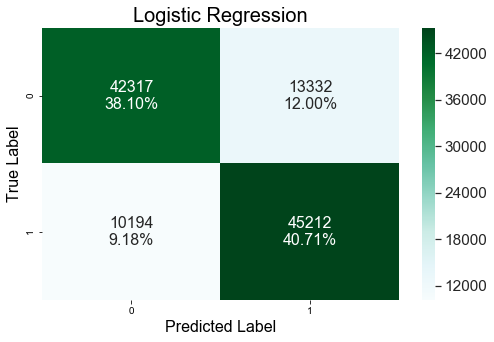

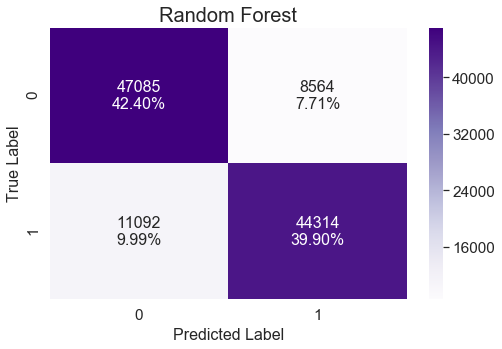

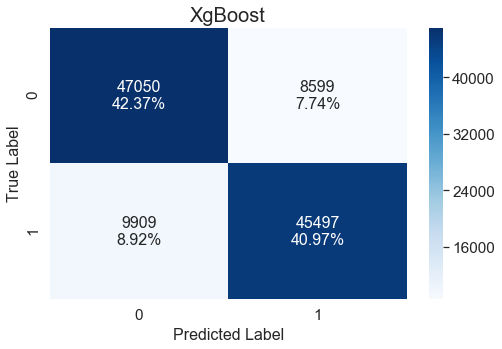

In [168]:
cm_plt(model_fit_def,test['Churn'],test.drop('Churn',axis=1))

In [181]:
unlabel = customerDF[customerDF.Churn.isnull()].drop('Churn',axis=1)
# predict churn
unlabel['Churn'] = model_fit_def[2].predict(unlabel)
unlabel.groupby('Churn').count()
# unlabel customer distribution

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,Ship Store_Store 24,...,Customer Segment_Platinum Prosperity,Customer Segment_Progressive Potpourri,Customer Segment_Reaping Rewards,"Customer Segment_Red, White and Bluegrass",Customer Segment_Rooted Flower Power,Customer Segment_Rural Escape,Customer Segment_Rural Southern Bliss,Customer Segment_Senior Discounts,Customer Segment_Settled and Sensible,Customer Segment_Settled in Suburbia,Customer Segment_Silver Sophisticates,Customer Segment_Small Town Shallow Pockets,Customer Segment_Sports Utility Families,Customer Segment_Status Seeking Singles,Customer Segment_Steadfast Conventionalists,Customer Segment_Stockcars and State Parks,Customer Segment_Striving Forward,Customer Segment_Striving Single Scene,Customer Segment_Suburban Attainment,Customer Segment_Tight Money,Customer Segment_Touch of Tradition,Customer Segment_Tough Times,Customer Segment_Town Elders,Customer Segment_True Grit Americans,Customer Segment_Unspoiled Splendor,Customer Segment_Urban Ambition,Customer Segment_Urban Edge,Customer Segment_Urban Survivors,Customer Segment_Wired for Success,Customer Group_Autumn Years,Customer Group_Blue Sky Boomers,Customer Group_Booming with Confidence,Customer Group_Cultural Connections,Customer Group_Economic Challenges,Customer Group_Families in Motion,Customer Group_Family Union,Customer Group_Flourishing Families,Customer Group_Golden Year Guardians,Customer Group_Middle-Class Melting Pot,Customer Group_Pastoral Pride,Customer Group_Power Elite,Customer Group_Promising Families,Customer Group_Significant Singles,Customer Group_Singles and Starters,Customer Group_Suburban Style,Customer Group_Thriving Boomers,Customer Group_Young City Solos,Customer Gender_Male,Customer Marital Status_Likely Married,Customer Marital Status_Likely Single
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,...,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154,47154
1.0,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,148981,...,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111,156111

In [195]:
unlabel.drop(new,axis=0).groupby('Churn').count()

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,Ship Store_Store 24,...,Customer Segment_Platinum Prosperity,Customer Segment_Progressive Potpourri,Customer Segment_Reaping Rewards,"Customer Segment_Red, White and Bluegrass",Customer Segment_Rooted Flower Power,Customer Segment_Rural Escape,Customer Segment_Rural Southern Bliss,Customer Segment_Senior Discounts,Customer Segment_Settled and Sensible,Customer Segment_Settled in Suburbia,Customer Segment_Silver Sophisticates,Customer Segment_Small Town Shallow Pockets,Customer Segment_Sports Utility Families,Customer Segment_Status Seeking Singles,Customer Segment_Steadfast Conventionalists,Customer Segment_Stockcars and State Parks,Customer Segment_Striving Forward,Customer Segment_Striving Single Scene,Customer Segment_Suburban Attainment,Customer Segment_Tight Money,Customer Segment_Touch of Tradition,Customer Segment_Tough Times,Customer Segment_Town Elders,Customer Segment_True Grit Americans,Customer Segment_Unspoiled Splendor,Customer Segment_Urban Ambition,Customer Segment_Urban Edge,Customer Segment_Urban Survivors,Customer Segment_Wired for Success,Customer Group_Autumn Years,Customer Group_Blue Sky Boomers,Customer Group_Booming with Confidence,Customer Group_Cultural Connections,Customer Group_Economic Challenges,Customer Group_Families in Motion,Customer Group_Family Union,Customer Group_Flourishing Families,Customer Group_Golden Year Guardians,Customer Group_Middle-Class Melting Pot,Customer Group_Pastoral Pride,Customer Group_Power Elite,Customer Group_Promising Families,Customer Group_Significant Singles,Customer Group_Singles and Starters,Customer Group_Suburban Style,Customer Group_Thriving Boomers,Customer Group_Young City Solos,Customer Gender_Male,Customer Marital Status_Likely Married,Customer Marital Status_Likely Single
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,...,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803,39803
1.0,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,65953,...,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,73083,7

In [193]:
unlabel.loc[new,:].groupby('Churn').count()
# new customer distribution

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,Ship Store_Store 24,...,Customer Segment_Platinum Prosperity,Customer Segment_Progressive Potpourri,Customer Segment_Reaping Rewards,"Customer Segment_Red, White and Bluegrass",Customer Segment_Rooted Flower Power,Customer Segment_Rural Escape,Customer Segment_Rural Southern Bliss,Customer Segment_Senior Discounts,Customer Segment_Settled and Sensible,Customer Segment_Settled in Suburbia,Customer Segment_Silver Sophisticates,Customer Segment_Small Town Shallow Pockets,Customer Segment_Sports Utility Families,Customer Segment_Status Seeking Singles,Customer Segment_Steadfast Conventionalists,Customer Segment_Stockcars and State Parks,Customer Segment_Striving Forward,Customer Segment_Striving Single Scene,Customer Segment_Suburban Attainment,Customer Segment_Tight Money,Customer Segment_Touch of Tradition,Customer Segment_Tough Times,Customer Segment_Town Elders,Customer Segment_True Grit Americans,Customer Segment_Unspoiled Splendor,Customer Segment_Urban Ambition,Customer Segment_Urban Edge,Customer Segment_Urban Survivors,Customer Segment_Wired for Success,Customer Group_Autumn Years,Customer Group_Blue Sky Boomers,Customer Group_Booming with Confidence,Customer Group_Cultural Connections,Customer Group_Economic Challenges,Customer Group_Families in Motion,Customer Group_Family Union,Customer Group_Flourishing Families,Customer Group_Golden Year Guardians,Customer Group_Middle-Class Melting Pot,Customer Group_Pastoral Pride,Customer Group_Power Elite,Customer Group_Promising Families,Customer Group_Significant Singles,Customer Group_Singles and Starters,Customer Group_Suburban Style,Customer Group_Thriving Boomers,Customer Group_Young City Solos,Customer Gender_Male,Customer Marital Status_Likely Married,Customer Marital Status_Likely Single
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,...,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351,7351
1.0,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,...,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028,83028


In [206]:
customerDF['Churn'] = customerDF['Churn'].combine_first(unlabel['Churn'])
customerDF.describe().round(2)

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,Ship Store_Store 24,...,Customer Segment_Progressive Potpourri,Customer Segment_Reaping Rewards,"Customer Segment_Red, White and Bluegrass",Customer Segment_Rooted Flower Power,Customer Segment_Rural Escape,Customer Segment_Rural Southern Bliss,Customer Segment_Senior Discounts,Customer Segment_Settled and Sensible,Customer Segment_Settled in Suburbia,Customer Segment_Silver Sophisticates,Customer Segment_Small Town Shallow Pockets,Customer Segment_Sports Utility Families,Customer Segment_Status Seeking Singles,Customer Segment_Steadfast Conventionalists,Customer Segment_Stockcars and State Parks,Customer Segment_Striving Forward,Customer Segment_Striving Single Scene,Customer Segment_Suburban Attainment,Customer Segment_Tight Money,Customer Segment_Touch of Tradition,Customer Segment_Tough Times,Customer Segment_Town Elders,Customer Segment_True Grit Americans,Customer Segment_Unspoiled Splendor,Customer Segment_Urban Ambition,Customer Segment_Urban Edge,Customer Segment_Urban Survivors,Customer Segment_Wired for Success,Customer Group_Autumn Years,Customer Group_Blue Sky Boomers,Customer Group_Booming with Confidence,Customer Group_Cultural Connections,Customer Group_Economic Challenges,Customer Group_Families in Motion,Customer Group_Family Union,Customer Group_Flourishing Families,Customer Group_Golden Year Guardians,Customer Group_Middle-Class Melting Pot,Customer Group_Pastoral Pride,Customer Group_Power Elite,Customer Group_Promising Families,Customer Group_Significant Singles,Customer Group_Singles and Starters,Customer Group_Suburban Style,Customer Group_Thriving Boomers,Customer Group_Young City Solos,Customer Gender_Male,Customer Marital Status_Likely Married,Customer Marital Status_Likely Single,Churn
count,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,566316.0,566316.00,566316.00,566316.00,566316.00,566316.00,566316.00,...,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.0,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00,573446.00
mean,34470.54,49.82,0.10,0.09,0.11,188.60,2.42,122.60,0.62,1.49,0.00,0.21,0.55,0.01,0.01,0.01,0.00,0.02,0.01,0.01,0.00,0.01,0.01,0.01,0.02,0.02,0.02,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.0,0.01,0.01,0.01,0.01,0.01,0.01,...,0.02,0.02,0.01,0.02,0.02,0.01,0.01,0.0

In [207]:
# predict churn probability
proba=model_fit_def[2].predict_proba(customerDF.drop('Churn',axis=1))
customerDF['Probability']=proba[:,1]
customerDF[['Churn','Probability']].to_csv('Predicted Churn Results.csv')

In [204]:
retrain.groupby('Churn').count()

,Customer Zip,Customer Age,Sales Returned %,Qty Returned %,Gross Profit Returned %,Sales Avg,Qty Avg,Gross Profit Avg,Profit Margin,Profitability,Ship Channel_Event,Ship Channel_Outlets,Ship Channel_Retail,Ship Store_Store 1,Ship Store_Store 10,Ship Store_Store 100,Ship Store_Store 101,Ship Store_Store 102,Ship Store_Store 103,Ship Store_Store 104,Ship Store_Store 105,Ship Store_Store 106,Ship Store_Store 107,Ship Store_Store 108,Ship Store_Store 109,Ship Store_Store 11,Ship Store_Store 110,Ship Store_Store 111,Ship Store_Store 113,Ship Store_Store 114,Ship Store_Store 115,Ship Store_Store 116,Ship Store_Store 117,Ship Store_Store 118,Ship Store_Store 119,Ship Store_Store 12,Ship Store_Store 120,Ship Store_Store 13,Ship Store_Store 14,Ship Store_Store 15,Ship Store_Store 16,Ship Store_Store 17,Ship Store_Store 18,Ship Store_Store 19,Ship Store_Store 2,Ship Store_Store 20,Ship Store_Store 21,Ship Store_Store 22,Ship Store_Store 23,Ship Store_Store 24,...,Customer Segment_Platinum Prosperity,Customer Segment_Progressive Potpourri,Customer Segment_Reaping Rewards,"Customer Segment_Red, White and Bluegrass",Customer Segment_Rooted Flower Power,Customer Segment_Rural Escape,Customer Segment_Rural Southern Bliss,Customer Segment_Senior Discounts,Customer Segment_Settled and Sensible,Customer Segment_Settled in Suburbia,Customer Segment_Silver Sophisticates,Customer Segment_Small Town Shallow Pockets,Customer Segment_Sports Utility Families,Customer Segment_Status Seeking Singles,Customer Segment_Steadfast Conventionalists,Customer Segment_Stockcars and State Parks,Customer Segment_Striving Forward,Customer Segment_Striving Single Scene,Customer Segment_Suburban Attainment,Customer Segment_Tight Money,Customer Segment_Touch of Tradition,Customer Segment_Tough Times,Customer Segment_Town Elders,Customer Segment_True Grit Americans,Customer Segment_Unspoiled Splendor,Customer Segment_Urban Ambition,Customer Segment_Urban Edge,Customer Segment_Urban Survivors,Customer Segment_Wired for Success,Customer Group_Autumn Years,Customer Group_Blue Sky Boomers,Customer Group_Booming with Confidence,Customer Group_Cultural Connections,Customer Group_Economic Challenges,Customer Group_Families in Motion,Customer Group_Family Union,Customer Group_Flourishing Families,Customer Group_Golden Year Guardians,Customer Group_Middle-Class Melting Pot,Customer Group_Pastoral Pride,Customer Group_Power Elite,Customer Group_Promising Families,Customer Group_Significant Singles,Customer Group_Singles and Starters,Customer Group_Suburban Style,Customer Group_Thriving Boomers,Customer Group_Young City Solos,Customer Gender_Male,Customer Marital Status_Likely Married,Customer Marital Status_Likely Single
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,...,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487,177487
1.0,284904,284904,284904,284904,284904,284904,284904,284904,284904,284904,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,277774,...,284904,284904,284904,284904,284904,284904,284904,284904,284904,284904,284904,284904,284904,284904,284904,2849

Semi-supervized learning: results did not improve so we will stick with the previous model

In [201]:
retrain = train.append(unlabel)
result_xgb, par_xgb, model_fit_xgb = evaluation(retrain.dropna(axis=0), test, 'Churn')

--------------------------
--------------------------
--------------------------


In [198]:
retrain.isnull().sum().sort_values()

Customer Zip                                         0
Customer DMA_San Angelo TX                           0
Customer DMA_San Antonio TX                          0
Customer DMA_San Diego CA                            0
Customer DMA_San Francisco-Oakland-San Jose CA       0
                                                  ... 
Order Store_Store 17                              7130
Order Store_Store 18                              7130
Order Store_Store 19                              7130
Order Store_Store 13                              7130
Order Store_Store 105                             7130
Length: 673, dtype: int64

In [203]:
result_xgb
# retrained model results are not better: a small degree of overfitting, auc and precision reduced slightly 

,Model,Training Accuracy,Test Accuracy,Train AUC,Test AUC,Precision,Recall
0,Logistic Regression,0.603594,0.519508,0.590328,0.602745,0.510234,0.920081
1,Random Forest,0.999991,0.822385,1.000000,0.901441,0.819282,0.826246
2,XgBoost,0.896998,0.830408,0.955000,0.912565,0.831605,0.827672


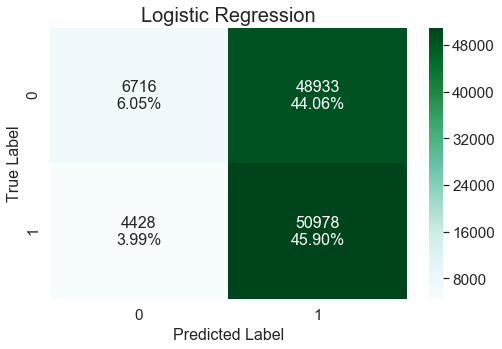

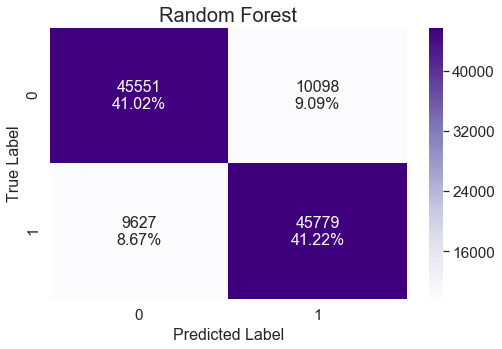

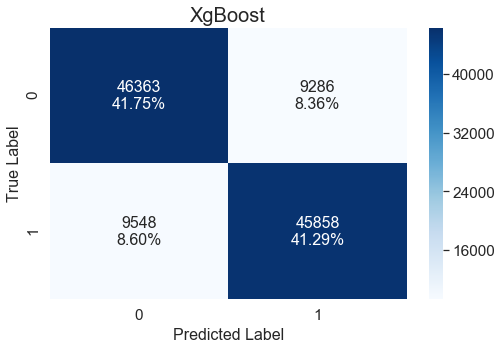

In [202]:
cm_plt(model_fit_xgb, test['Churn'], test.drop('Churn',axis=1))